#Mental Health in tech Data Analysis
This dataset is from a 2014 survey that measures attitudes towards mental health and frequency of mental health disorders in the tech workplace. You are also encouraged to analyze data from the ongoing 2016 survey found here.


## More about dataset
https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

###Note to Reviewer

I was not entirely sure about the exact instructions, so I decided to follow the same tasks from the primer exercise but applied them to a different dataset. Later, I also added some of my own plots and analyses for further exploration.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('survey.csv')
df.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Gender names unification

I noticed that names are not unificated so I decided to unifie them because the dataset is not consistent since genders are written as F, M, male, female, Male etc.

In [71]:
df['Gender'] = df['Gender'].str.strip().str.lower()

fixed_genders_dataframe = df.copy()

def simple_clean_gender(g):
    if pd.isna(g):
        return "Other"
    if g in ["m", "male", "man"]:
        return "male"
    if g in ["f", "female", "woman"]:
        return "female"
    return "Other"

fixed_genders_dataframe['Gender'] = fixed_genders_dataframe['Gender'].apply(simple_clean_gender)


#Exercise 1

- Load house sales data from file, print first records.
- Print the variable list. Select categorical and numerical variables.
- Compute basic statistics of numerical variables.



# Load house sales data from file, print first records.



In [72]:
fixed_genders_dataframe.head()


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,male,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


#Print the variable list. Select categorical and numerical variables.


In [111]:
print("\nColumns in dataset:")
print(fixed_genders_dataframe.columns.tolist())

categorical_vars = fixed_genders_dataframe.select_dtypes(include=['object']).columns.tolist()
numerical_vars = ['Age', 'no_employees_num']

print("\nCategorical variables:")
print(categorical_vars)

print("\nNumerical variables:")
print(numerical_vars)



Columns in dataset:
['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments', 'no_employees_num', 'work_interfere_num', 'treatment_num']

Categorical variables:
['Timestamp', 'Gender', 'Country', 'state', 'self_employed', 'family_history', 'treatment', 'work_interfere', 'no_employees', 'remote_work', 'tech_company', 'benefits', 'care_options', 'wellness_program', 'seek_help', 'anonymity', 'leave', 'mental_health_consequence', 'phys_health_consequence', 'coworkers', 'supervisor', 'mental_health_interview', 'phys_health_interview', 'mental_vs_physical', 'obs_consequence', 'comments']

Numerical variables:
['Age', 'no

#Compute basic statistics of numerical variables.


In [113]:
print("\nBasic statistics of numerical variables:")
print(fixed_genders_dataframe[numerical_vars].describe())



Basic statistics of numerical variables:
               Age  no_employees_num
count  1251.000000       1251.000000
mean     32.076739        433.215827
std       7.288272        598.783368
min      18.000000          3.000000
25%      27.000000         15.000000
50%      31.000000         63.000000
75%      36.000000        750.000000
max      72.000000       1500.000000


#Exercise 2
Using scatter plot:
- Age vs Company Size.
- Treatment vs Other Factors.
- Geographical Distribution of Respondents

#a) Conclusion
There seems to be no clear relationship between age and company size; respondents of all ages work in companies of various sizes.

Text(0, 0.5, 'Age')

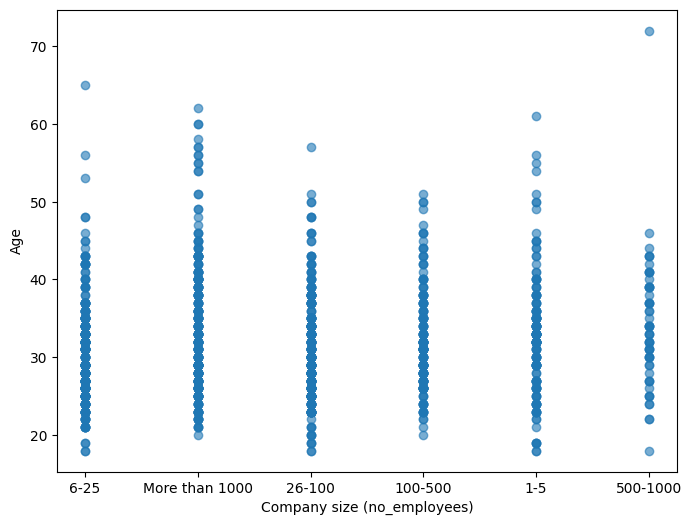

In [97]:
# a)
plt.figure(figsize=(8,6))
plt.scatter(fixed_genders_dataframe['no_employees'], fixed_genders_dataframe['Age'], alpha=0.6)
plt.xlabel("Company size (no_employees)")
plt.ylabel("Age")

# b) Conclusion

There is no obvious trend between age and how much mental health interferes with work. Interference levels are scattered across all ages.

/tmp/ipython-input-3594400982.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_genders_dataframe['work_interfere_num'] = fixed_genders_dataframe['work_interfere'].map(interf_map)


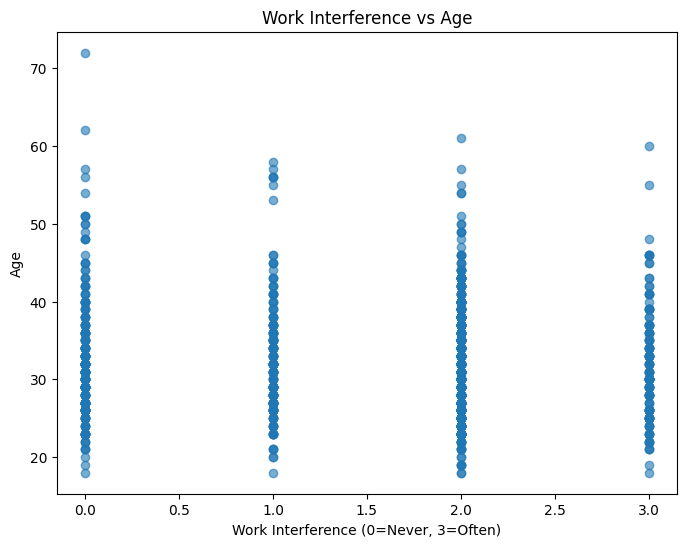

In [98]:
interf_map = {"Never":0, "Rarely":1, "Sometimes":2, "Often":3}
fixed_genders_dataframe['work_interfere_num'] = fixed_genders_dataframe['work_interfere'].map(interf_map)

plt.figure(figsize=(8,6))
plt.scatter(fixed_genders_dataframe['work_interfere_num'], fixed_genders_dataframe['Age'], alpha=0.6)
plt.xlabel("Work Interference (0=Never, 3=Often)")
plt.ylabel("Age")
plt.title("Work Interference vs Age")
plt.show()


#c)Conclusion
In the United States, respondents cover the full age range. Overall, it's difficult to draw clear conclusions due to varying numbers of respondents per country.

/tmp/ipython-input-763308803.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fixed_genders_dataframe['treatment_num'] = fixed_genders_dataframe['treatment'].map(treatment_map)


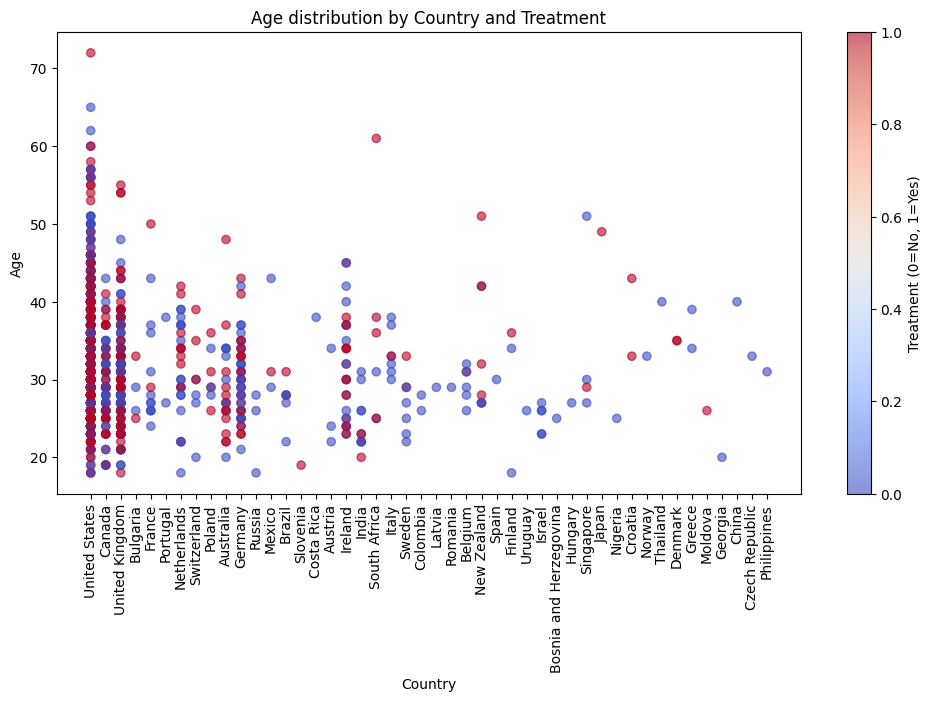

In [99]:
treatment_map = {"No":0, "Yes":1}
fixed_genders_dataframe['treatment_num'] = fixed_genders_dataframe['treatment'].map(treatment_map)

plt.figure(figsize=(12,6))
plt.scatter(fixed_genders_dataframe['Country'], fixed_genders_dataframe['Age'],
            c=fixed_genders_dataframe['treatment_num'], cmap='coolwarm', alpha=0.6)
plt.xlabel("Country")
plt.ylabel("Age")
plt.title("Age distribution by Country and Treatment")
plt.xticks(rotation=90)
plt.colorbar(label="Treatment (0=No, 1=Yes)")
plt.show()

#Exercise 3
- Create a boxplot of company size (no_employees) versus age (Age).
- Create mosaic plot of any two categorical variables.

### Age Distribution by Company Size

The analysis of employee age across different company sizes shows no significant relationship.  

- The median age ranges from **30 to 34 years** across all company size categories.  
- Most employees fall within the **26–39 years** range.  
- The age range (min–max) indicates that each group includes both younger employees (18–20 years) and older ones (up to 72 years), with outliers not significantly affecting the mean.  

**Conclusion:** Employee age is relatively consistent regardless of company size.


<Figure size 1000x600 with 0 Axes>

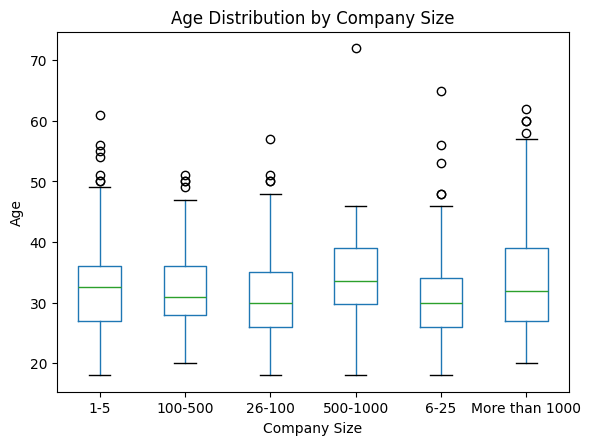

In [103]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
fixed_genders_dataframe.boxplot(column='Age', by='no_employees', grid=False)
plt.xlabel("Company Size")
plt.ylabel("Age")
plt.title("Age Distribution by Company Size")
plt.suptitle("")
plt.show()



###Conclusion:
The mosaic plot reflects these proportions clearly: the “Yes” section is much larger for respondents with a family history than for those without. It highlights that family history is an important factor influencing whether someone seeks mental health treatment

<Figure size 1000x600 with 0 Axes>

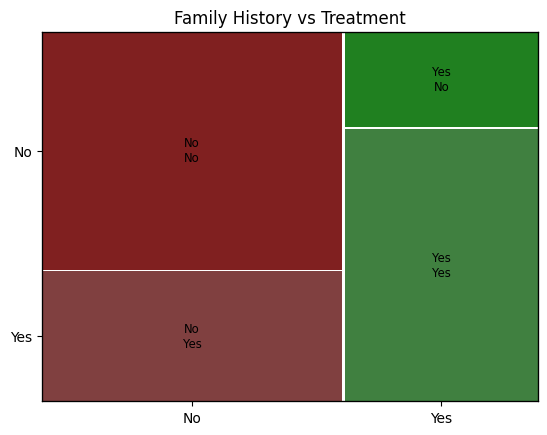

In [106]:
from statsmodels.graphics.mosaicplot import mosaic

plt.figure(figsize=(10,6))
mosaic(fixed_genders_dataframe, ['family_history', 'treatment'], title="Family History vs Treatment")
plt.show()


# Exercise 4

Here I created some custom plots and performed specific computations on selected subsets of the dataset.
The aim was to explore patterns related to gender, remote work, and family history of mental illness.


#Gender distribution in the dataset

As we can see, the majority of respondents are male. This may be due to the fact that men are more prevalent in the tech industry.

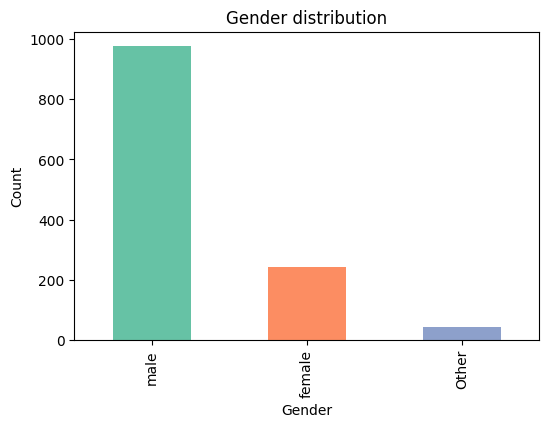

In [75]:
fixed_genders_dataframe['Gender'].value_counts().plot(
    kind='bar', figsize=(6,4), color=['#66c2a5','#fc8d62','#8da0cb']
)
plt.title("Gender distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()


# Effect of Remote Work on Mental Health

This chart shows the relationship between working remotely (50% or more of the time) and whether respondents have sought treatment for a mental health condition. It illustrates how remote work may be associated with mental health concerns in the tech workplace.


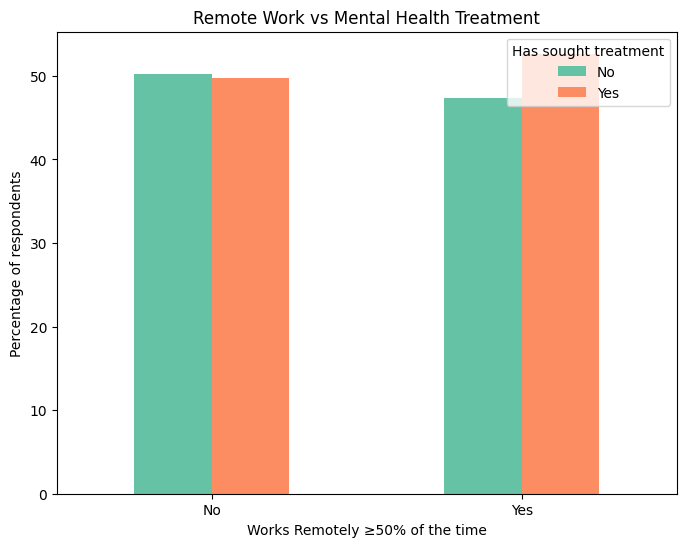

In [76]:
remote_treatment = pd.crosstab(
    fixed_genders_dataframe['remote_work'],
    fixed_genders_dataframe['treatment'],
    normalize='index'
) * 100

remote_treatment.plot(
    kind='bar', figsize=(8,6), color=['#66c2a5','#fc8d62']
)
plt.title("Remote Work vs Mental Health Treatment")
plt.xlabel("Works Remotely ≥50% of the time")
plt.ylabel("Percentage of respondents")
plt.legend(title="Has sought treatment")
plt.xticks(rotation=0)
plt.show()



In [77]:
print(remote_treatment)


treatment           No        Yes
remote_work                      
No           50.283126  49.716874
Yes          47.340426  52.659574


### Conclusion – Remote Work vs Mental Health Treatment

The data shows a slight difference in mental health treatment seeking depending on remote work status:

* Among respondents who **do not work remotely**, approximately **50%** have sought treatment, and 50% have not.
* Among respondents who **work remotely 50% or more of the time**, about **53%** have sought treatment, slightly higher than those who don’t work remotely.

This suggests a small association between working remotely and seeking mental health treatment, but the difference is not very large. Other factors may play a stronger role in determining whether someone seeks help.


# 1. Family history vs. Treatment


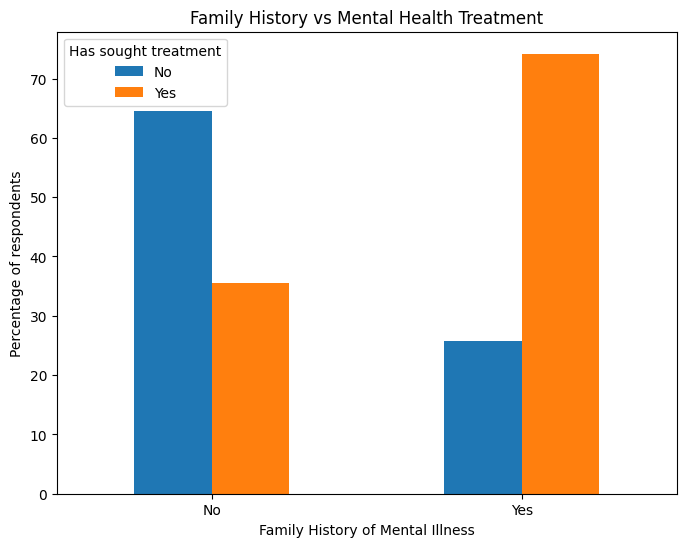

In [78]:
family_treatment = pd.crosstab(
    fixed_genders_dataframe['family_history'],
    fixed_genders_dataframe['treatment'],
    normalize='index'
) * 100

family_treatment.plot(
    kind='bar',
    figsize=(8,6),
)

plt.title("Family History vs Mental Health Treatment")
plt.xlabel("Family History of Mental Illness")
plt.ylabel("Percentage of respondents")
plt.legend(title="Has sought treatment")
plt.xticks(rotation=0)
plt.show()


In [79]:
print(family_treatment_full)


treatment                     No        Yes
family_history_filled                      
No                     64.537158  35.462842
Yes                    25.813008  74.186992


##Conclusion

The data shows a clear relationship between family history of mental illness and seeking treatment:
- Among respondents without a family history of mental illness, about 35% have sought treatment, while 65% have not.

- Among respondents with a family history of mental illness, approximately 74% have sought treatment, while only 26% have not.

This indicates that having a family history of mental health issues is strongly associated with a higher likelihood of seeking treatment

#Map of Mental Health Treatment by Country (≥20 Respondents)
Here I wanted to create a map showing the percentage of respondents who sought mental health treatment by country.
To make the analysis more reliable, I decided to include only countries with at least 20 respondents,
as smaller sample sizes may not provide meaningful estimates.


In [80]:
country_counts = fixed_genders_dataframe['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Respondent_Count']

country_counts = country_counts.sort_values(by='Respondent_Count', ascending=False)

print(country_counts)


                   Country  Respondent_Count
0            United States               751
1           United Kingdom               185
2                   Canada                72
3                  Germany                45
4              Netherlands                27
5                  Ireland                27
6                Australia                21
7                   France                13
8                    India                10
9              New Zealand                 8
10                  Poland                 7
11                   Italy                 7
12                  Sweden                 7
13             Switzerland                 7
14            South Africa                 6
15                  Brazil                 6
16                 Belgium                 6
17                  Israel                 5
18               Singapore                 4
19                Bulgaria                 4
20                  Russia                 3
21        

In [81]:
total_per_country = fixed_genders_dataframe.groupby('Country').size().reset_index(name='Total_Respondents')

total_per_country = total_per_country[total_per_country['Total_Respondents'] >= 20]

treated_per_country = fixed_genders_dataframe[fixed_genders_dataframe['treatment'] == 'Yes'] \
    .groupby('Country').size().reset_index(name='Treated_Count')

country_treatment_percent = total_per_country.merge(treated_per_country, on='Country', how='left')

country_treatment_percent['Treated_Count'] = country_treatment_percent['Treated_Count'].fillna(0)

country_treatment_percent['Percent_Treated'] = (country_treatment_percent['Treated_Count'] / country_treatment_percent['Total_Respondents']) * 100

country_treatment_percent = country_treatment_percent.sort_values(by='Percent_Treated', ascending=False)

print(country_treatment_percent)


          Country  Total_Respondents  Treated_Count  Percent_Treated
0       Australia                 21             13        61.904762
6   United States                751            410        54.593875
1          Canada                 72             37        51.388889
5  United Kingdom                185             93        50.270270
3         Ireland                 27             13        48.148148
2         Germany                 45             21        46.666667
4     Netherlands                 27              9        33.333333


This table above shows the percentage of respondents who sought mental health treatment by country. Only countries with at least 20 respondents were included in this analysis, as a smaller number of responses would not provide a reliable estimate of percentages (although even 20 respondents is still quite a small sample in practice).

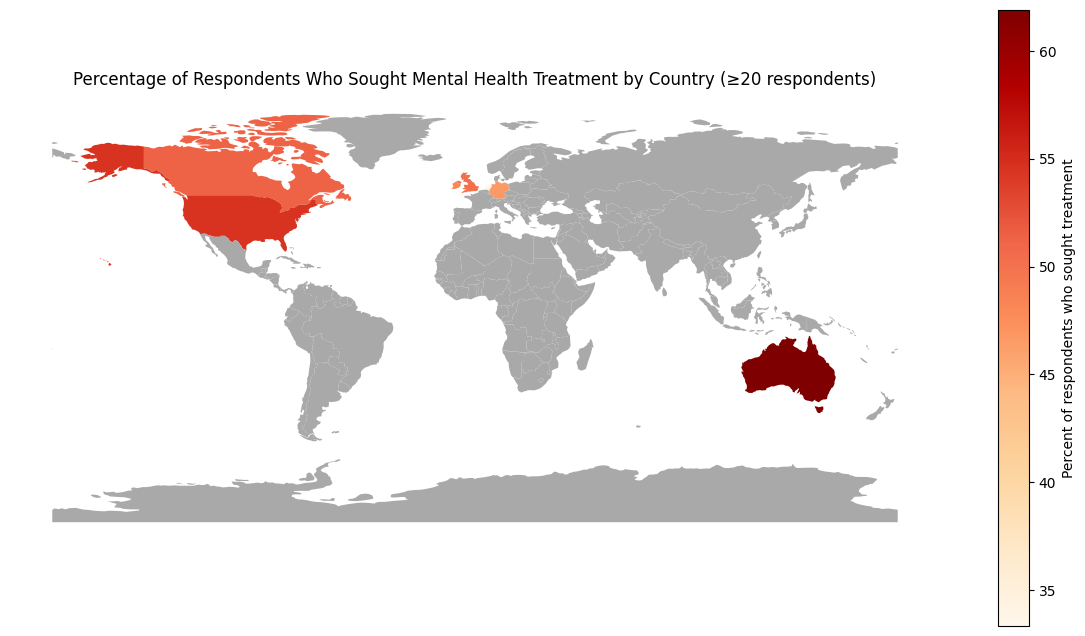

In [82]:
import geopandas as gpd
import matplotlib.pyplot as plt

url = "https://github.com/nvkelso/natural-earth-vector/raw/master/geojson/ne_110m_admin_0_countries.geojson"
world = gpd.read_file(url)

country_treatment_percent['Country'] = country_treatment_percent['Country'].replace({
    "United States": "United States of America",
    "UK": "United Kingdom",
    "South Korea": "Korea, Republic of",
    "North Korea": "Korea, Democratic People's Republic of",
    "Russia": "Russian Federation"
})

world_treatment = world.merge(country_treatment_percent, how='left', left_on='NAME', right_on='Country')

world_treatment['Color_Value'] = world_treatment['Percent_Treated']
world_treatment.loc[world_treatment['Color_Value'] == 0, 'Color_Value'] = None

fig, ax = plt.subplots(1, 1, figsize=(15,8))
world_treatment.plot(
    column='Color_Value',
    ax=ax,
    cmap='OrRd',
    legend=True,
    legend_kwds={'label': "Percent of respondents who sought treatment"},
    missing_kwds={'color': 'darkgrey'}
)

plt.title("Percentage of Respondents Who Sought Mental Health Treatment by Country (≥20 respondents)")
plt.axis('off')
plt.show()


# Conclusion
From the data, we can observe that:

- Australia has the highest percentage of respondents seeking treatment, with approximately 62%.

- The United States follows with about 55%, despite having the largest number of respondents (751).

- Canada and the United Kingdom also show similar percentages, around 51% and 50%, respectively.

- The Netherlands has the lowest percentage among these selected countries, with around 33% of respondents seeking treatment.

This suggests that, in the tech workplaces surveyed, a significant proportion of employees across different countries are seeking mental health support, but the prevalence varies by country.